In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import groupby

In [2]:
label=pd.read_csv('ID_Gender_Age_datasets.csv')
label=label.drop('Unnamed: 0',axis=1)

In [4]:
label=label[['Gender(0:Female;1:Male)','Age']]

In [104]:
lst = label['Age'].sort_values()
dic = {}

for k, g in groupby(lst, key=lambda x: (x-1)//10):
    dic['{}-{}'.format(k*10+1, (k+1)*10)] = len(list(g))
    
print(dic)

{'1-10': 214, '11-20': 150, '21-30': 94, '31-40': 117, '41-50': 127, '51-60': 32, '61-70': 19, '71-80': 10}


In [105]:
r1_10=label.iloc[lst[0:214].index].groupby(['Gender(0:Female;1:Male)']).count()
r10_20=label.iloc[lst[214:364].index].groupby(['Gender(0:Female;1:Male)']).count()
r20_30=label.iloc[lst[364:458].index].groupby(['Gender(0:Female;1:Male)']).count()
r30_40=label.iloc[lst[458:575].index].groupby(['Gender(0:Female;1:Male)']).count()
r40_50=label.iloc[lst[575:702].index].groupby(['Gender(0:Female;1:Male)']).count()
r50_60=label.iloc[lst[702:734].index].groupby(['Gender(0:Female;1:Male)']).count()
r60_70=label.iloc[lst[734:753].index].groupby(['Gender(0:Female;1:Male)']).count()
r70_80=label.iloc[lst[753:763].index].groupby(['Gender(0:Female;1:Male)']).count()

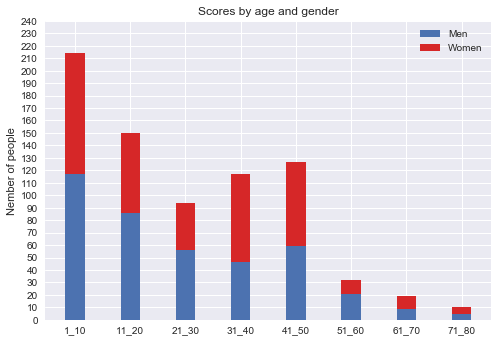

In [106]:
N = len(dic)
menMeans = (r1_10.iloc[1].values[0], r10_20.iloc[1].values[0], r20_30.iloc[1].values[0], r30_40.iloc[1].values[0], 
            r40_50.iloc[1].values[0], r50_60.iloc[1].values[0], r60_70.iloc[1].values[0], r70_80.iloc[1].values[0])
womenMeans = (r1_10.iloc[0].values[0], r10_20.iloc[0].values[0], r20_30.iloc[0].values[0], r30_40.iloc[0].values[0], 
            r40_50.iloc[0].values[0], r50_60.iloc[0].values[0], r60_70.iloc[0].values[0], r70_80.iloc[0].values[0])

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, color='#d62728',
             bottom=menMeans)

plt.ylabel('Nember of people')
plt.title('Scores by age and gender')
plt.xticks(ind, ('1_10', '11_20', '21_30', '31_40', '41_50', '51_60', '61_70', '71_80'))
plt.yticks(np.arange(0, 250, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()